### Business challenge/requirement
Lithionpower is the largest provider of electric vehicle(e-vehicle) batteries. It provides battery on a rental model to e-vehicle drivers. Drivers rent battery typically for a day and then replace it with a charged battery from the company.
Lithionpower has a variable pricing model based on driver's driving history. As the life of a battery depends on factors such as overspeeding, distance driven per day etc.
You as a ML expert have to create a cluster model where drivers can be grouped together based on the driving data.
Key issues
Drivers will be incentivized based on the cluster, so grouping has to be accurate
Considerations
NONE
Data volume
- 4000 records – file driver-data.csv
Fields in Data
• id: Unique Id of the driver
• mean_dist_day: Mean distance driven by driver per day
• mean_over_speed_perc: Mean percentage of time a driver was > 5 mph over the speed limit
Additional information
- NA
Business benefits
Increase in profits, up to 15-20% as drivers with poor history will be charged more

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
driverdata = pd.read_csv('driver-data.csv')

In [5]:
driverdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
id                      4000 non-null int64
mean_dist_day           4000 non-null float64
mean_over_speed_perc    4000 non-null int64
dtypes: float64(1), int64(2)
memory usage: 93.8 KB


In [6]:
driverdata.shape

(4000, 3)

In [7]:
driverdata.sample(10)

,id,mean_dist_day,mean_over_speed_perc
2020,3423312760,42.39,4
459,3423314389,54.99,36
3236,3423312723,190.97,76
3711,3423312157,209.64,7
1337,3423310789,57.40,9
3648,3423310561,164.95,11
102,3423311066,67.23,5
172,3423312808,47.75,20
1612,3423310630,53.80,3
2067,3423311217,49.37,9


In [8]:
from sklearn.cluster import KMeans

In [9]:
driverdata = driverdata.drop('id', axis=1)

In [11]:
driverdata.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [40]:
kmeans = KMeans(n_clusters=4)

In [41]:
kmeans.fit(driverdata)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [42]:
kmeans.cluster_centers_

array([[ 50.49167849,  32.49172577,   2.91489362],
       [180.34311782,  10.52011494,   1.00143678],
       [ 49.9799964 ,   5.22434282,   1.03060857],
       [177.83509615,  70.28846154,   4.        ]])

In [43]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [44]:
labels, counts = np.unique(kmeans.labels_, return_counts=True)

In [45]:
dict(zip(labels, counts))

{0: 423, 1: 696, 2: 2777, 3: 104}

In [46]:
#plot the cluster

In [47]:
driverdata['cluster']= kmeans.labels_

In [48]:
driverdata.head()

,mean_dist_day,mean_over_speed_perc,cluster
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1296x1296 with 0 Axes>

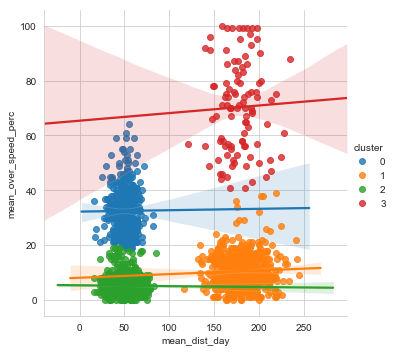

In [49]:
plt.figure(figsize=(18,18))
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=driverdata, hue='cluster')
plt.show()